In [137]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from time import time

In [138]:
np.random.seed(42)

M = 100

x = np.sort(np.random.uniform(-3,3, size=(M, 1)), axis=0)
n = np.random.normal(loc=0.0, scale=1, size=(M, 1))

y = 2 + x + 0.5*x**2 + x**3
y_noisy = y + n

x_train, x_test, y_train, y_test = train_test_split(x, y_noisy, test_size=0.3, random_state=10)

a)


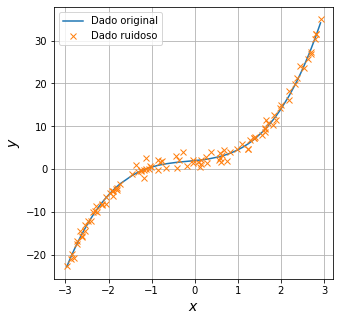

In [139]:
print('a)')
# Plot original data versus noisy version.
fig = plt.figure(figsize=(5,5))
plt.plot(x, y, label='Dado original')
plt.plot(x, y_noisy, 'x', label='Dado ruidoso')
#plt.plot(x_test, y_test, 'o', label='Dado teste')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend()
plt.grid()
plt.savefig("target_function.png", dpi=600)
#Show the plot.
plt.show()

In [140]:
def plotErrorVsIteration(Jgd, iteration):
    fig = plt.figure(figsize=(5, 5))
    plt.plot(np.arange(0, iteration), Jgd[0:iteration])
    plt.xlim((0, iteration))
    plt.yscale('log')
    plt.xlabel('Iteration')
    plt.ylabel('$J_e$')
    plt.title('Error vs. Iteration number')
    plt.show()

def hypothesis(a, x_train):
    h = 0
    for i in range(a.shape[0]):
        h = h + a[i,0]*x_train**i
    return h

def gradient(x_train, y_train, h, M):
    grad = -(2/M)*x_train.T.dot(y_train - h)
    return grad 

def BatchGradientDescent(x_train, y_train, x_test, y_test, alpha, maxNumIter, model_order, M):
    minimum_val_error = float("inf")
    error_train = []
    error_test = []
    
    a = np.zeros((model_order, maxNumIter))
    for i in range(a.shape[0]):
        a[i, 0] = -30
    
    Jgd = np.zeros(maxNumIter)
    h = hypothesis(a[:, 0].reshape((model_order, 1)), x_train)
    Jgd[0] = (1/M)*np.sum(np.power(y_train - h, 2))
    
    iteration = 0
    #c)
    while(iteration < maxNumIter-1):
        h = hypothesis(a[:, iteration].reshape((model_order, 1)), x_train)
        grad = gradient(x_train, y_train, h, M)
        a_aux = a[:, iteration].reshape((model_order, 1)) - alpha*grad
        
        for i in range(a.shape[0]):
            a[i, iteration+1] = a_aux[i,0]
        h = hypothesis(a[:, iteration+1].reshape((model_order, 1)), x_train)
        Jgd[iteration+1] = (1/M)*np.sum(np.power(y_train - h, 2))
        
        y_test_regul = hypothesis(a[:, iteration+1].reshape((model_order, 1)), x_test)
        #d)
        error_train.append(Jgd[iteration+1])
        error_test.append((mean_squared_error(y_test, y_test_regul)))
        
        #e)
        if mean_squared_error(y_test, y_test_regul) < minimum_val_error:
            minimum_val_error = mean_squared_error(y_test, y_test_regul)
            best_model = a_aux
        
        iteration += 1
    
    return Jgd, a, iteration, error_train, error_test, best_model, minimum_val_error 

Resolution time (Batch): 1.3498494625091553 s


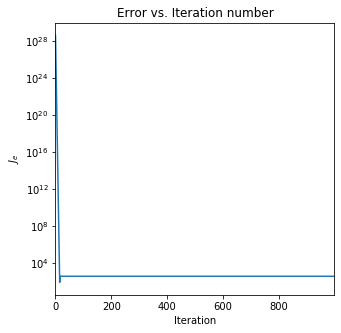

b) O melhor valor para o passo de aprendizagem é 1e-13


In [141]:
# Polynomial order.
model_order = 30
alpha = 10**(-13)
maxNumIter = 1000
tic = time()
Jgd, a, iteration, error_train, error_test, best_model, minimum_val_error = BatchGradientDescent(x_train, y_train, x_test, y_test, alpha, maxNumIter, model_order, M)
toc = time()
print('Resolution time (Batch): ' + str(toc - tic) + ' s')
plotErrorVsIteration(Jgd, iteration)

print('b) O melhor valor para o passo de aprendizagem é ' + str(alpha))

f)


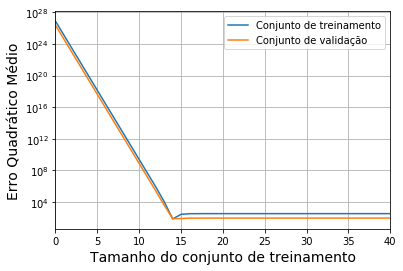

In [142]:
print('f)')
plt.plot(error_train, label='Conjunto de treinamento')
plt.plot(error_test, label='Conjunto de validação')
plt.yscale('log')
plt.xlabel('Tamanho do conjunto de treinamento', fontsize=14)
plt.ylabel('Erro Quadrático Médio', fontsize=14)
plt.grid()
plt.xlim([0, 40])
plt.legend()
plt.show()

g)


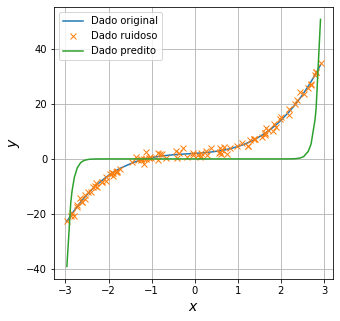

In [143]:
print('g)')
y_prediction = hypothesis(best_model.reshape((model_order, 1)), x)

fig = plt.figure(figsize=(5,5))
plt.plot(x, y, label='Dado original')
plt.plot(x, y_noisy, 'x', label='Dado ruidoso')
plt.plot(x, y_prediction, label='Dado predito')
#plt.plot(x_test, y_test, 'o', label='Dado teste')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend()
plt.grid()
plt.savefig("target_function.png", dpi=600)
#Show the plot.
plt.show()